In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import cv2

In [22]:
folder_path = "/content/drive/My Drive/UTKFace_extracted/"

In [31]:
sum = 0
folder_list = []
for folder in sorted(os.listdir(folder_path)):# Sort folder list
  number_files = len(os.listdir(os.path.join(folder_path,folder)))
  sum = sum + number_files
  print(f"folder: {folder}, files: {number_files}")
  folder_list.append(folder)

print(f"Total facial images: {sum}")

folder: part1, files: 10137
folder: part2, files: 10719
folder: part3, files: 3253
Total facial images: 24109


### Reading an image

100_1_0_20170110183726390.jpg
['100', '1', '0']
(470, 450, 3)


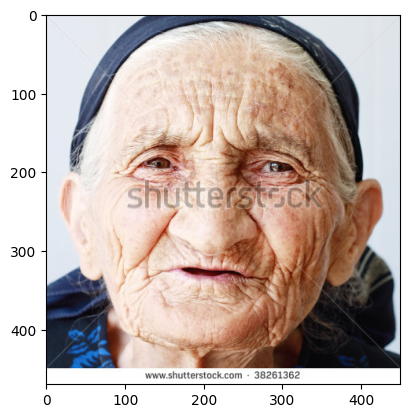

In [24]:
folder_path = "/content/drive/My Drive/UTKFace_extracted/"
folder = folder_list[0]     # 0, 1 or 2 will determine part1, part2 or part3.

folder_path = os.path.join(folder_path, folder)
for file in sorted(os.listdir(folder_path)):
  print(file)
  print(file.split('_')[:-1])
  ## Read the images
  img = cv2.imread(os.path.join(folder_path, file), cv2.IMREAD_COLOR)
  # Convert default BGR format to RGB to use in Matplotlib
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure()
  plt.imshow(img)
  print(img.shape)
  break

In [29]:
folder_path = "/content/drive/My Drive/UTKFace_extracted/"

# age: is an integer from 0 to 116, indicating the age
# gender: is either 0 (male) or 1 (female)
# race: is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

column_names = ['Age', 'Gender', 'Race']
records = []

for folder in folder_list:
  full_path = os.path.join(folder_path, folder)
  for file in sorted(os.listdir(full_path)):
    records.append(file.split('_')[:-1])

# Create the DataFrame
DF = pd.DataFrame(records, columns=column_names)

# Convert to numeric, setting errors='coerce' to handle non-numeric values
DF = DF.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (which were non-numeric)
DF = DF.dropna()

# Convert the DataFrame to integer type (after removing non-numeric entries)
DF = DF.astype(int)

# Check the first few rows
DF.head()

,Age,Gender,Race
0,100,1,0
1,100,1,2
2,100,1,2
3,101,1,2
4,10,0,0


In [30]:
DF.shape

(24104, 3)

In [32]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24104 entries, 0 to 24108
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     24104 non-null  int64
 1   Gender  24104 non-null  int64
 2   Race    24104 non-null  int64
dtypes: int64(3)
memory usage: 753.2 KB


##Distribution of gender

Text(0.5, 1.0, 'Distribution of gender in the UTKFace dataset')

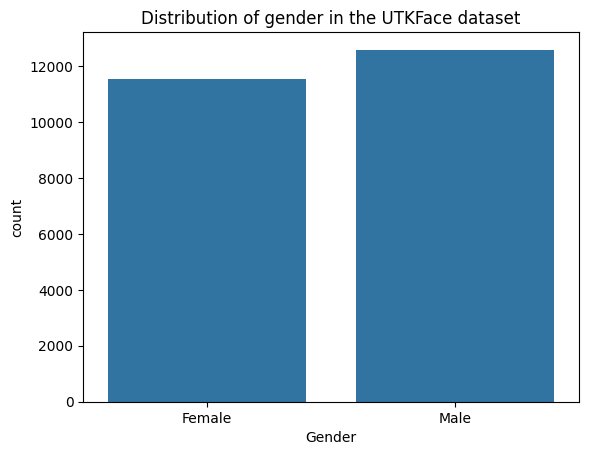

In [33]:
gender_mapping = {
    0: 'Male',
    1: 'Female'
}

DFrame = DF.copy()

# Replace the integers with correct gender
DFrame['Gender'] = DF['Gender'].replace(gender_mapping)

# Count plot
plt.figure()
sns.countplot(x='Gender', data=DFrame)
plt.title('Distribution of gender in the UTKFace dataset')

## Distribution of race

Text(0.5, 1.0, 'Distribution of race in the UTKFace dataset')

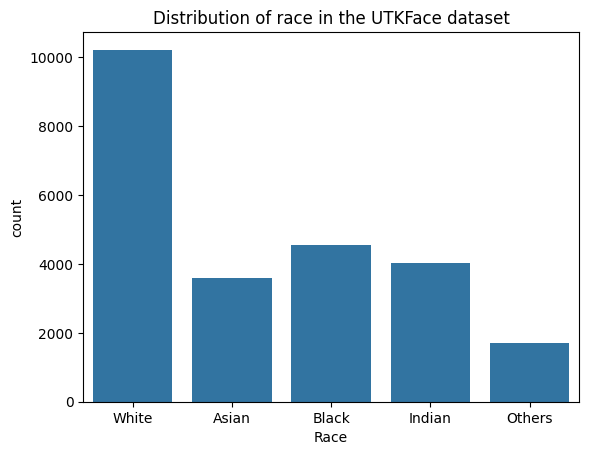

In [34]:
# Race Mapping
race_mapping = {
    0 : 'White',
    1 : 'Black',
    2 : 'Asian',
    3 : 'Indian',
    4 : 'Others'
}

# Replace the integers with correct race
DFrame['Race'] = DFrame['Race'].replace(race_mapping)

# Count plot
plt.figure()
sns.countplot(x='Race', data=DFrame)
plt.title('Distribution of race in the UTKFace dataset')

## Distribution of age

[Text(0, 0, '1'),
 Text(10, 0, '11'),
 Text(20, 0, '21'),
 Text(30, 0, '31'),
 Text(40, 0, '41'),
 Text(50, 0, '51'),
 Text(60, 0, '61'),
 Text(70, 0, '71'),
 Text(80, 0, '81'),
 Text(90, 0, '91'),
 Text(100, 0, '110')]

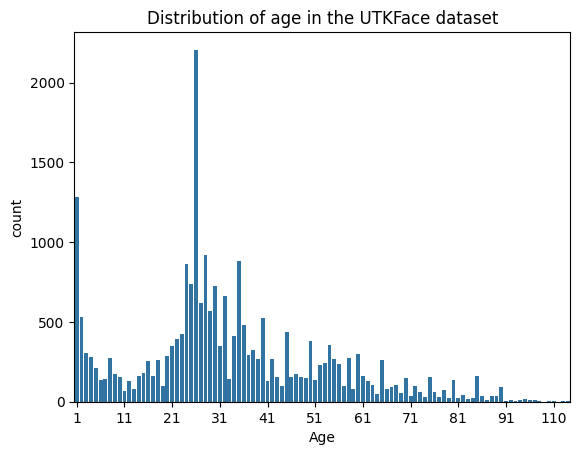

In [35]:
# Count plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.countplot(x='Age', data=DFrame)
plt.title('Distribution of age in the UTKFace dataset')

# Get the current ticks and labels
current_ticks = ax.get_xticks()
current_labels = ax.get_xticklabels()
# Select specific ticks to show every 10th tick
step_size = 10
select_ticks = current_ticks[::step_size]
select_labels = current_labels[::step_size]
# Set the new ticks and labels
ax.set_xticks(select_ticks)
ax.set_xticklabels(select_labels)

##Age distribution by gender

[Text(0, 0, '1'),
 Text(10, 0, '11'),
 Text(20, 0, '21'),
 Text(30, 0, '31'),
 Text(40, 0, '41'),
 Text(50, 0, '51'),
 Text(60, 0, '61'),
 Text(70, 0, '71'),
 Text(80, 0, '81'),
 Text(90, 0, '91'),
 Text(100, 0, '110')]

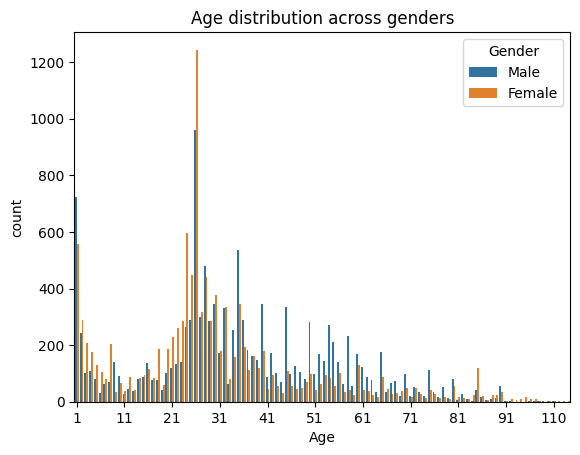

In [36]:
# Count plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.countplot(x='Age', hue='Gender', data=DFrame, ax=ax)
plt.title('Age distribution across genders')

# Get the current ticks and labels
current_ticks = ax.get_xticks()
current_labels = ax.get_xticklabels()
# Select specific ticks to show every 10th tick
step_size = 10
select_ticks = current_ticks[::step_size]
select_labels = current_labels[::step_size]
# Set the new ticks and labels
ax.set_xticks(select_ticks)
ax.set_xticklabels(select_labels)

## Distribution of age groups

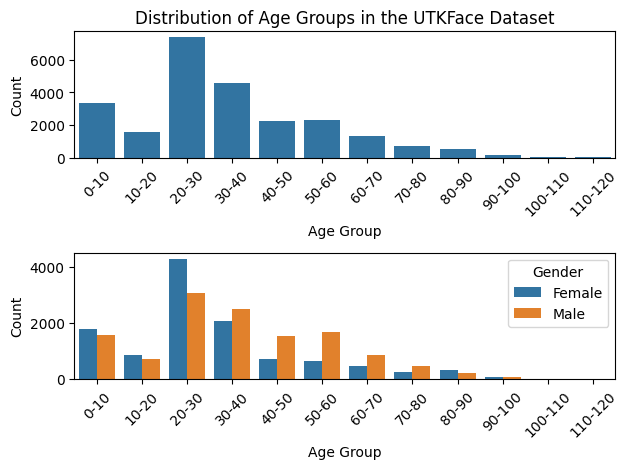

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create age bins and group labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]  # Define age groups
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80',
          '80-90', '90-100','100-110', '110-120']

# Add a new column 'AgeGroup' with the categorized age ranges
DFrame['AgeGroup'] = pd.cut(DFrame['Age'], bins=bins, labels=labels, right=False)

# Plot the distribution of age groups
fig, ax = plt.subplots(2, 1)
sns.countplot(x='AgeGroup', data=DFrame, ax=ax[0])
sns.countplot(x='AgeGroup', hue='Gender', data=DFrame, ax=ax[1])

# Customize plot
ax[0].set_title('Distribution of Age Groups in the UTKFace Dataset')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Count')

# Rotate x-tick labels for both axes
for a in ax:
    for label in a.get_xticklabels():
        label.set_rotation(45)  # Rotate x-tick labels by 45 degrees

plt.tight_layout()
plt.show()


## Race count by gender

Text(0.5, 1.0, 'Race count by gender')

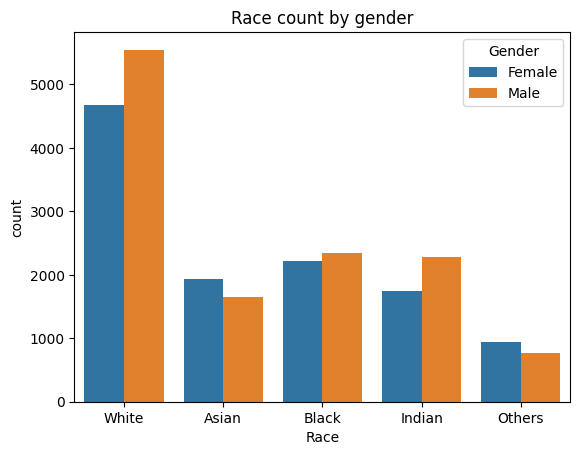

In [37]:
# Count plot
plt.figure()
sns.countplot(x='Race', hue='Gender', data=DFrame)
plt.title('Race count by gender')

## Treemap

In [38]:
# Treemap
import plotly.express as px
fig = px.treemap(DFrame, path=['Gender','Race'], color='Age')
fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False
fig.show()

## Donut chart / Nested pie chart

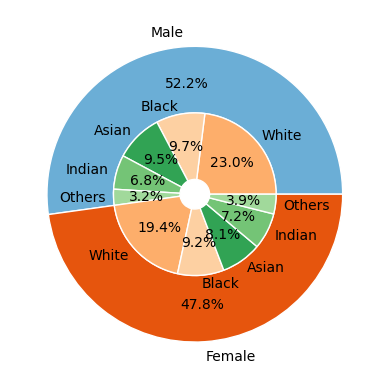

In [39]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([6,7,8,9,10, 6,7,8,9,10])
size = 0.45
pctdist = 0.75

# Counts all the people travelling in the spaceship
DF_tot = DFrame['Gender'].value_counts()

# Outer pie chart (to show distribution of age variable)
ax.pie(
    np.array(DF_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Male', 'Female']    #[0, 1]
     #[df_tot.index[0],df_tot.index[1]]  #[True, False]
);

# Counts of races in females
DF_F = DFrame.Race[DFrame['Gender']=='Female'].value_counts()

# Counts of races in males
DF_M = DFrame.Race[DFrame['Gender']=='Male'].value_counts()

# Concatenate arrays, for use in inner pie chart
concat_arrays= np.concatenate((np.array(DF_M), np.array(DF_F)))  #T, F

# Inner pie chart (to show sub-distribution of "race")
ax.pie(
    concat_arrays,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    #labels=['0','4','0']
    labels=['White','Black','Asian','Indian', 'Others',
            'White','Black','Asian','Indian', 'Others',]   #White, Black, Asian, Indian, and Others
);

## Distribution of age groups by gender across races

<ipython-input-55-3a7ca7b07f3c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-3a7ca7b07f3c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-3a7ca7b07f3c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-3a7ca7b

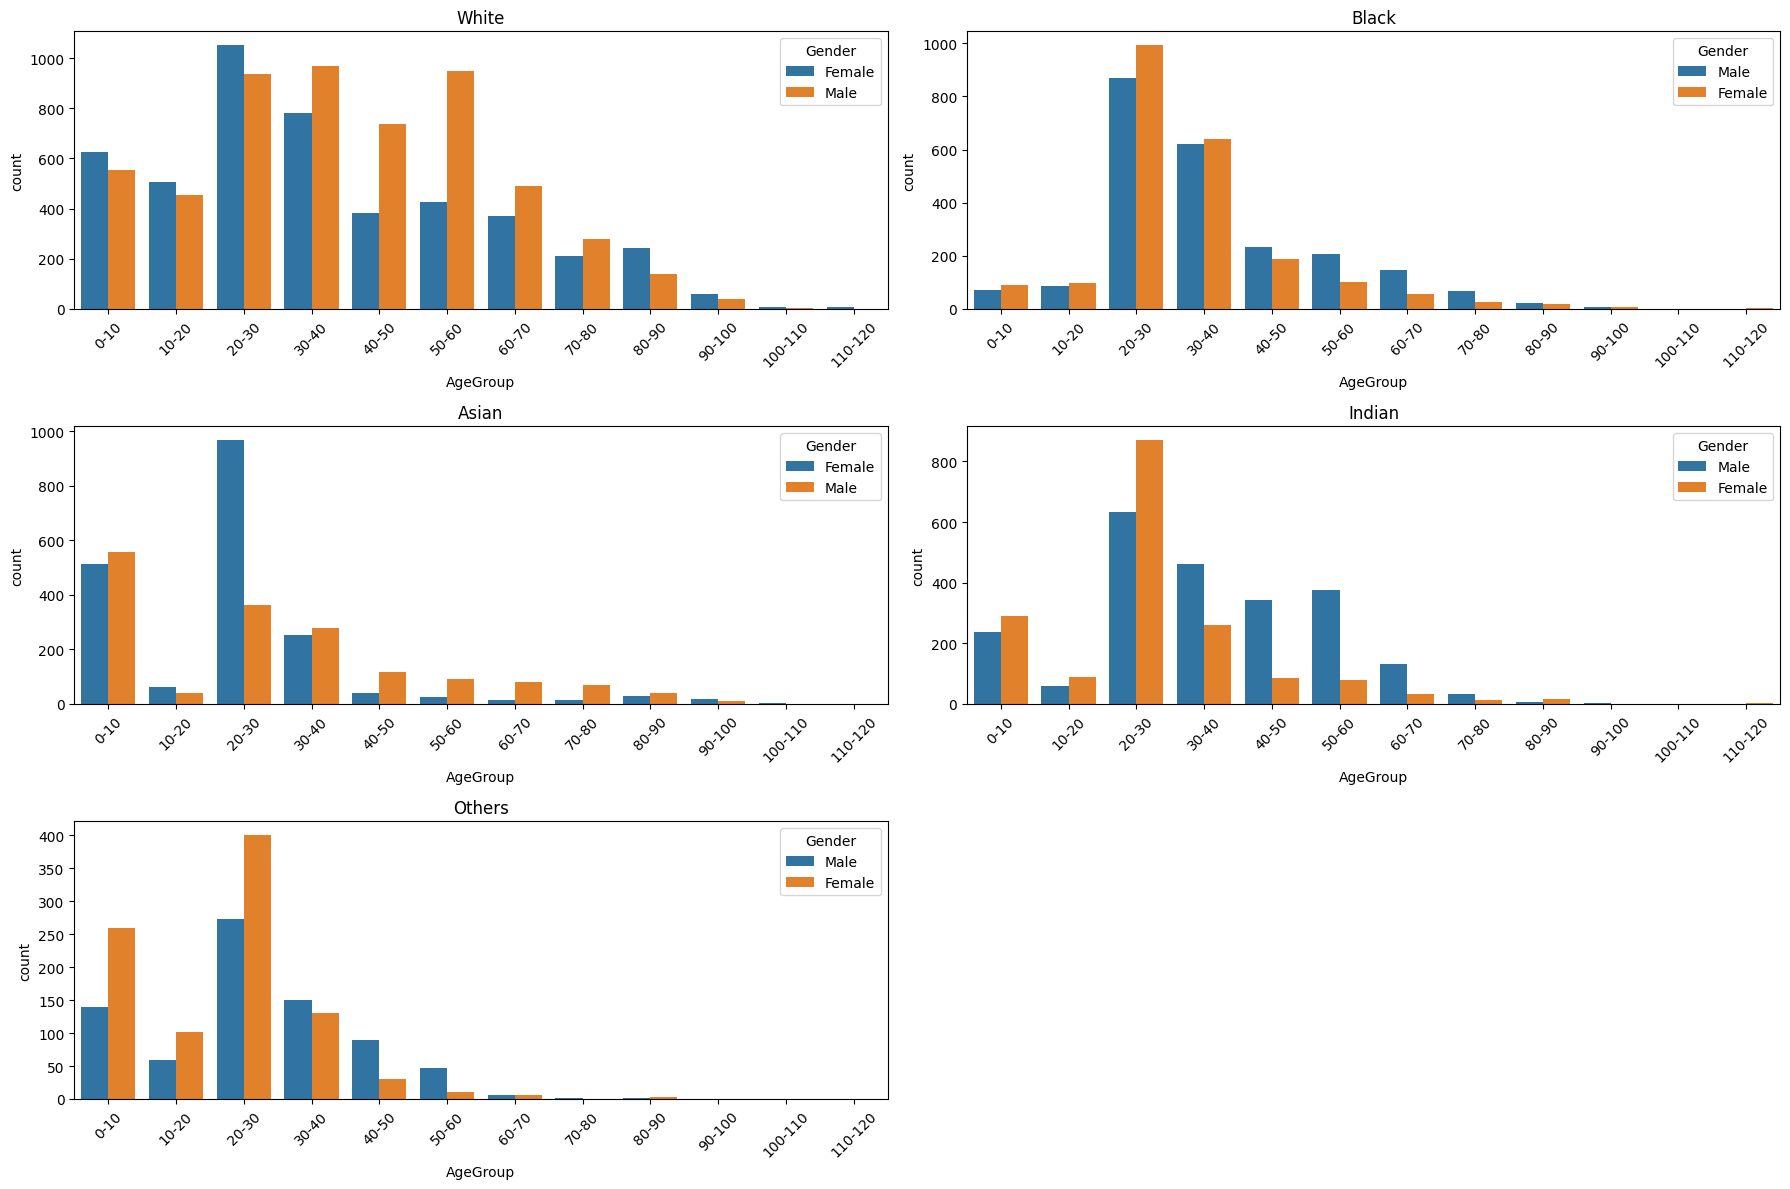

In [55]:

# Create age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]  # Define age groups
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
'70-80', '80-90', '90-100', '100-110', '110-120']

# Apply age grouping to each subset based on race
for df in ['DF_white', 'DF_black', 'DF_asian', 'DF_indian', 'DF_others']:
    globals()[df]['AgeGroup'] = pd.cut(globals()[df]['Age'], bins=bins, labels=labels, right=False)

# Create the subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

# Plot the distribution of age groups for each race
sns.countplot(x='AgeGroup', hue='Gender', data=DF_white, ax=axs[0, 0])
axs[0, 0].set_title('White')

sns.countplot(x='AgeGroup', hue='Gender', data=DF_black, ax=axs[0, 1])
axs[0, 1].set_title('Black')

sns.countplot(x='AgeGroup', hue='Gender', data=DF_asian, ax=axs[1, 0])
axs[1, 0].set_title('Asian')

sns.countplot(x='AgeGroup', hue='Gender', data=DF_indian, ax=axs[1, 1])
axs[1, 1].set_title('Indian')

sns.countplot(x='AgeGroup', hue='Gender', data=DF_others, ax=axs[2, 0])
axs[2, 0].set_title('Others')

# Customizing xticks with rotation to improve readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Remove subplot (2,1) which is the last plot
fig.delaxes(axs[2, 1])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


## Distribution of age by gender across races

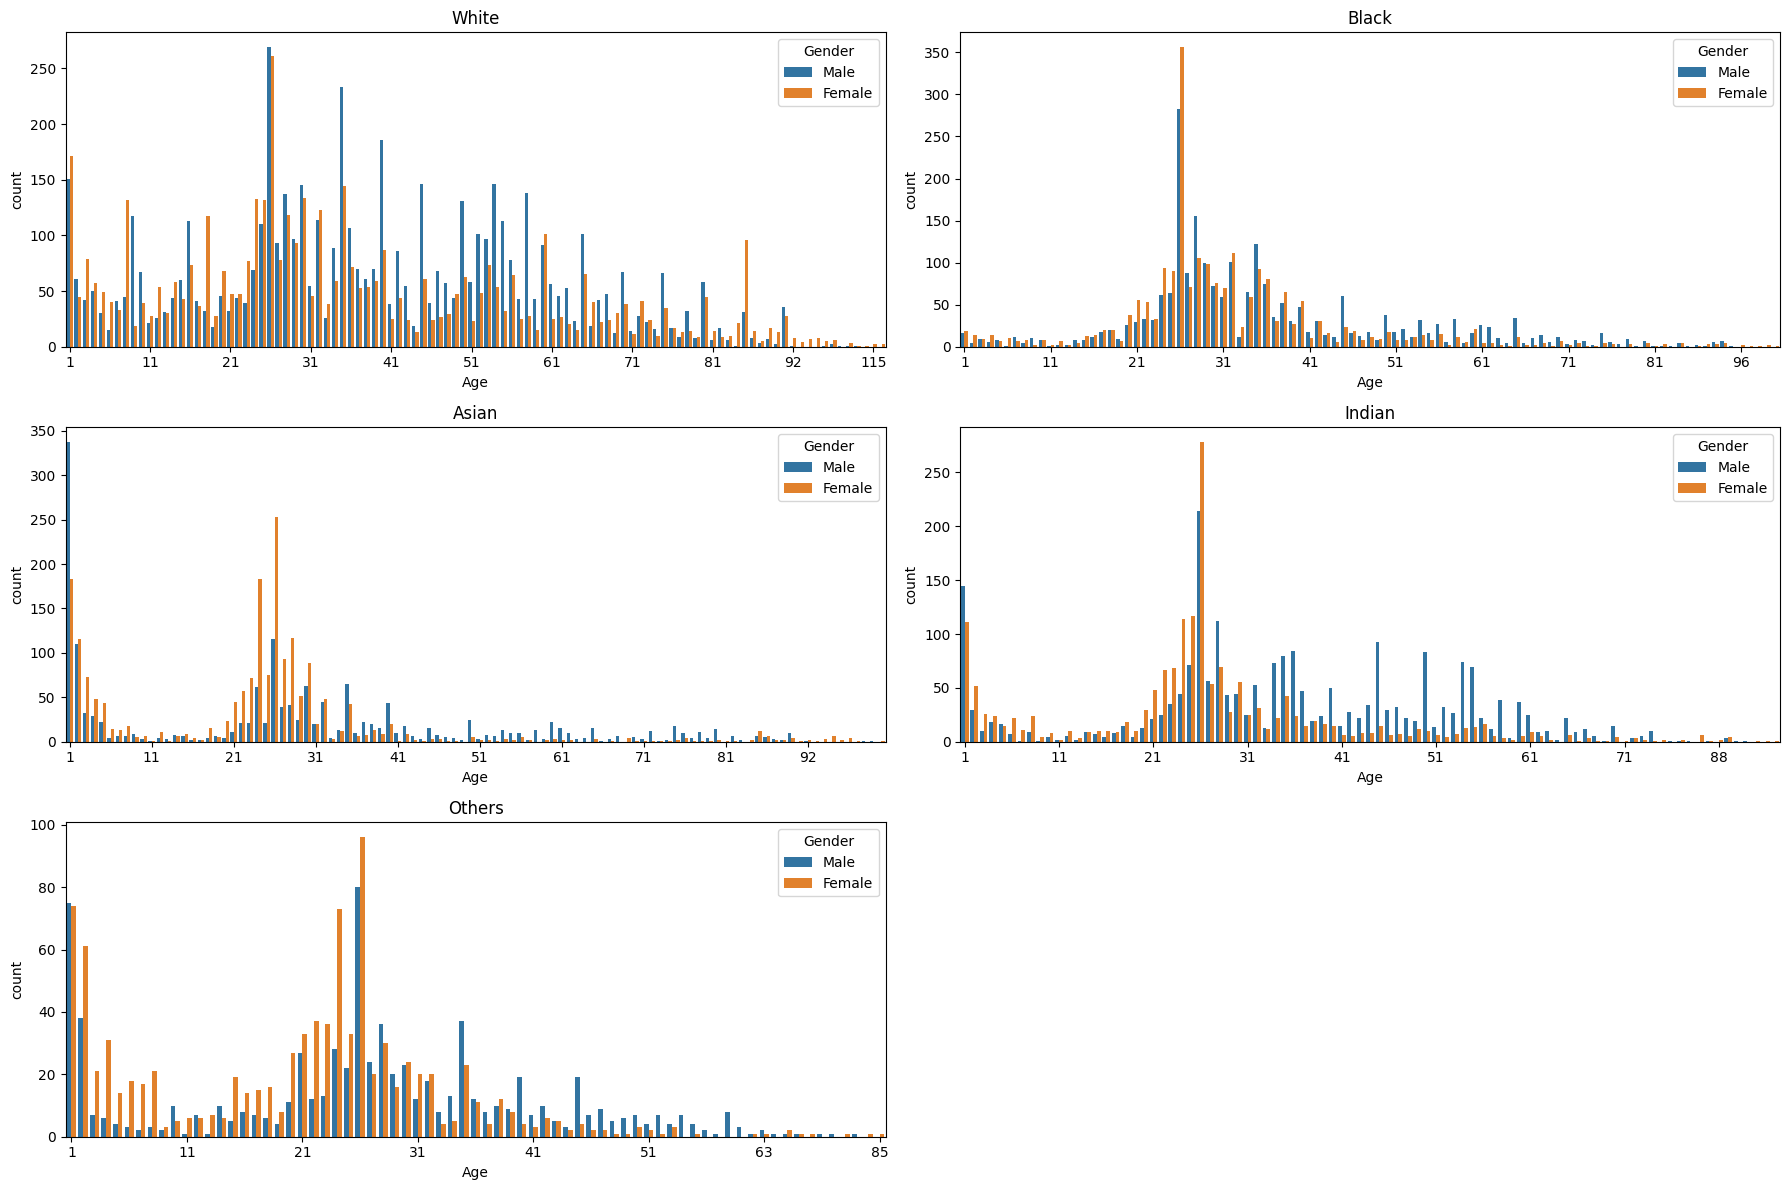

In [40]:
DF_white = DFrame[DFrame['Race']=='White']
DF_black = DFrame[DFrame['Race']=='Black']
DF_asian = DFrame[DFrame['Race']=='Asian']
DF_indian = DFrame[DFrame['Race']=='Indian']
DF_others = DFrame[DFrame['Race']=='Others']

fig, axs = plt.subplots(3,2, figsize=(18,12))
sns.countplot(x='Age', hue='Gender', data=DF_white, ax=axs[0,0])
axs[0,0].set_title('White')
sns.countplot(x='Age', hue='Gender', data=DF_black, ax=axs[0,1])
axs[0,1].set_title('Black')
sns.countplot(x='Age', hue='Gender', data=DF_asian, ax=axs[1,0])
axs[1,0].set_title('Asian')
sns.countplot(x='Age', hue='Gender', data=DF_indian, ax=axs[1,1])
axs[1,1].set_title('Indian')
sns.countplot(x='Age', hue='Gender', data=DF_others, ax=axs[2,0])
axs[2,0].set_title('Others')

def customize_xticks(ax, step_size):
  # Get the current ticks and labels
  current_ticks = ax.get_xticks()
  current_labels = ax.get_xticklabels()
  # Select specific ticks to show every 10th tick
  select_ticks = current_ticks[::step_size]
  select_labels = current_labels[::step_size]
  # Set the new ticks and labels
  ax.set_xticks(select_ticks)
  ax.set_xticklabels(select_labels)

customize_xticks(axs[0,0], 10)
customize_xticks(axs[0,1], 10)
customize_xticks(axs[1,0], 10)
customize_xticks(axs[1,1], 10)
customize_xticks(axs[2,0], 10)

# Remove subplot (2,2) which is the last plot
fig.delaxes(axs[2, 1])

# Adjustint layout to ensure everything fits well
plt.tight_layout()